In [106]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score

In [107]:
df = pd.read_csv('A-train.csv')


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      181 non-null    float64
 1   x2      180 non-null    float64
 2   x3      180 non-null    float64
 3   x4      181 non-null    float64
 4   x5      180 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      181 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [109]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,181.000000,180.000000,180.000000,1.810000e+02,180.000000,180.000000,180.000000,181.000000,188.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,386.982400,363.353742,453.783083,8.599234e+05,35.906821,32.370122,34.640373,31.525100,8.350511
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-62.680000,-61.442500,-60.385000,1.266650e+03,-6.060000,-4.710000,-5.907500,-7.200000,-2.260000
50%,12.210000,12.595000,1.815000,4.546800e+03,-0.760000,2.180000,-0.295000,-0.160000,3.555000
75%,75.650000,81.890000,53.740000,1.289133e+04,6.667500,8.462500,6.075000,6.600000,10.620000
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


In [110]:
for col in df.columns:
    percentiles = df[col].quantile([0.05, 0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

In [111]:
df[["x3","x8"]].describe(include="all")

,x3,x8
count,180.000000,181.000000
mean,-3.400856,-0.581050
std,83.747219,9.685067
min,-175.146500,-18.910000
25%,-60.385000,-7.200000
50%,1.815000,-0.160000
75%,53.740000,6.600000
max,145.450500,16.270000


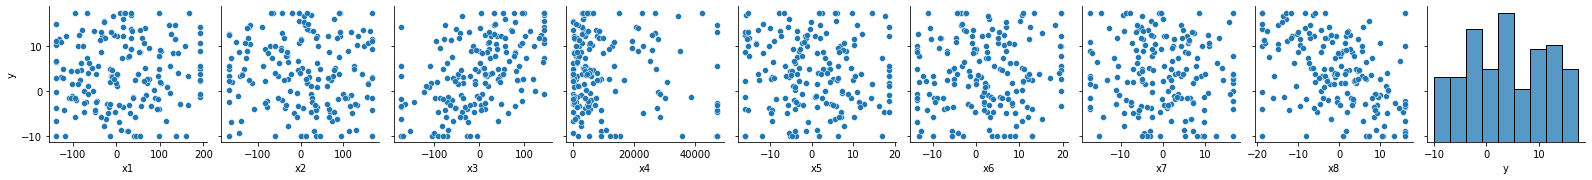

In [112]:
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

In [113]:
df.corr()
df.corr().sort_values("y")[["y"]]

,y
x8,-0.490993
x4,-0.085376
x2,-0.064025
x5,-0.059070
x7,-0.053514
x1,0.041003
x6,0.064758
x3,0.520713
y,1.000000


In [114]:
X = df[["x3","x8"]]
y = df["y"]

<AxesSubplot:xlabel='y', ylabel='Count'>

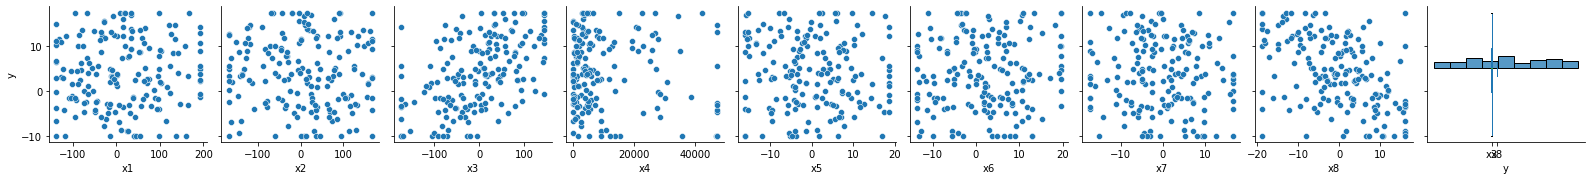

In [115]:
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])
X.boxplot()

In [116]:
df["x3"].fillna(df["x3"].median(), inplace=True)
df["x8"].fillna(df["x8"].median(), inplace=True)
df["y"].fillna(df["y"].median(), inplace=True)



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      181 non-null    float64
 1   x2      180 non-null    float64
 2   x3      190 non-null    float64
 3   x4      181 non-null    float64
 4   x5      180 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [118]:
df[["x3","x8"]].describe(include="all")

,x3,x8
count,190.000000,190.000000
mean,-3.126337,-0.561105
std,81.509942,9.452083
min,-175.146500,-18.910000
25%,-58.435000,-6.825000
50%,1.815000,-0.160000
75%,49.057500,6.355000
max,145.450500,16.270000


In [119]:
df.corr()
df.corr().sort_values("y")[["y"]]

,y
x8,-0.479173
x4,-0.085205
x2,-0.064446
x5,-0.059026
x7,-0.053099
x1,0.040653
x6,0.064804
x3,0.506249
y,1.000000


In [120]:
X = df[["x3","x8"]]
Y = df["y"]



In [121]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [122]:
lm = LinearRegression()
lm.fit(X_scaled,Y)

LinearRegression()

In [123]:
y_pred = lm.predict(X_scaled)

  
rmse = metrics.mean_squared_error(y, y_pred, squared=False)
print(" RMSE = ", rmse)

 RMSE =  5.274827877081751


In [124]:
coefficient_of_dermination = r2_score(y,y_pred)

In [125]:
coefficient_of_dermination

0.5339499455138542

In [126]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 4.280008535029084 * x3    +
 -4.088095596005726 * x8    +
 3.9040789473684216


In [127]:
df = pd.read_csv('A-test.csv')

In [129]:
df["x3"].fillna(df["x3"].median(), inplace=True)
df["x8"].fillna(df["x8"].median(), inplace=True)

In [130]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.16,4.49,-105.75,600.25,-0.91,NaN,-1.36,-7.43,A_01
1,-24.74,-1.55,91.05,2401.98,-1.52,13.60,5.66,10.59,A_02
2,107.54,-28.69,-82.59,25789.15,5.29,-8.56,1.49,-4.73,A_03
3,12.02,32.32,-16.47,2.76,1.20,-9.52,-4.20,7.48,A_04
4,45.08,96.62,51.85,1.28,3.58,0.52,-6.86,-0.78,A_05
5,-122.81,17.79,-182.85,2928.97,-1.21,-2.06,9.68,-8.59,A_06
6,77.61,-72.30,97.28,19173.94,-9.29,0.86,7.06,-8.06,A_07
7,-79.36,NaN,-220.91,NaN,7.24,6.19,NaN,9.71,A_08
8,NaN,188.39,-16.47,3976.56,NaN,-1.04,-23.44,-0.83,A_09
9,-44.01,131.65,69.88,1778.31,-13.75,-14.75,-12.27,-0.83,A_10


In [131]:
X = df[["x3","x8"]]

In [132]:
y_pred = lm.predict(X)

In [134]:
for i in y_pred:
        print(i)

-418.33227335363466
350.3059237000658
-330.2451337915765
-97.16661668268341
229.01123605351088
-743.5787405130103
453.21335973880383
-981.288014763122
-63.19454227987583
306.3841947198855
